In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from math import radians, tan
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error as mse
%matplotlib inline
training = pd.read_csv("/Users/brianritz/temp/training_tuning.csv")

In [14]:
pano_degrees_per_pixel=0.0196
pano = training.iloc[61:,:]
nopano = training.iloc[:51,:]
nopano.columns

Index([u'Unnamed: 0', u'photo_no', u'distance', u'x1', u'y1', u'x2', u'y2', u'pano', u'predicted_7.0', u'resid_7.0', u'predicted_7.1', u'resid_7.1', u'predicted_7.2', u'resid_7.2', u'predicted_7.3', u'resid_7.3', u'predicted_7.4', u'resid_7.4', u'predicted_7.5', u'resid_7.5', u'predicted_7.6', u'resid_7.6', u'predicted_7.7', u'resid_7.7', u'predicted_7.8', u'resid_7.8', u'predicted_7.9', u'resid_7.9', u'predicted_8.0', u'resid_8.0', u'predicted_8.1', u'resid_8.1', u'predicted_8.2', u'resid_8.2', u'predicted_8.3', u'resid_8.3', u'predicted_8.4', u'resid_8.4', u'predicted_8.5', u'resid_8.5', u'predicted_8.6', u'resid_8.6', u'predicted_8.7', u'resid_8.7', u'predicted_8.8', u'resid_8.8', u'predicted_8.9', u'resid_8.9', u'predicted_9.0', u'resid_9.0', u'predicted_9.1', u'resid_9.1', u'predicted_9.2', u'resid_9.2', u'predicted_9.3', u'resid_9.3', u'predicted_9.4', u'resid_9.4', u'predicted_9.5', u'resid_9.5', u'predicted_9.6', u'resid_9.6', u'predicted_9.7', u'resid_9.7', u'predicted_9.8', u

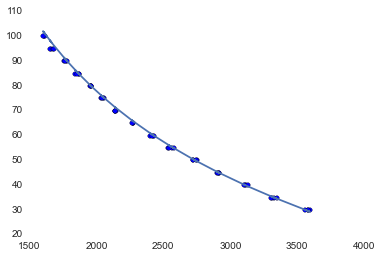

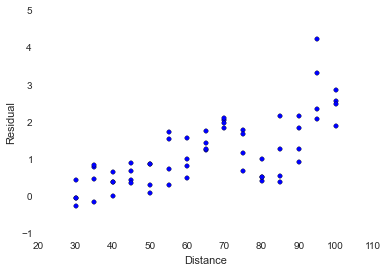

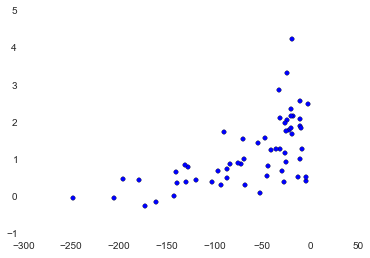

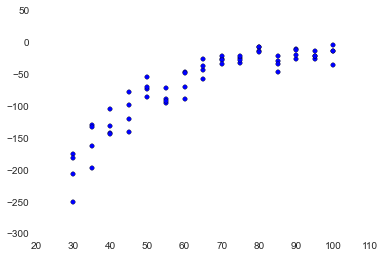

In [16]:
plt.figure()
plt.scatter(pano.xdiff, pano.distance)
plt.plot(pano.xdiff, pano.xdiff.apply(lambda x: (60.5-8.5) / tan(radians(x*pano_degrees_per_pixel*(60.5-8.5)/60.5))))
plt.figure()
plt.scatter(pano.distance, pano['resid_8.4'])
plt.xlabel("Distance")
plt.ylabel("Residual")
plt.figure()
plt.scatter(pano.ydiff, pano['resid_8.4'])
plt.figure()
plt.scatter(pano.distance, pano.ydiff)


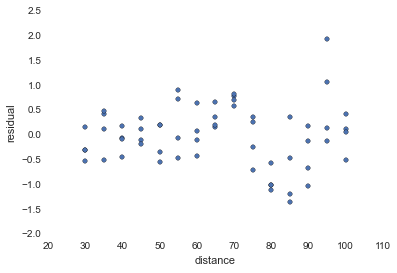

In [43]:
## not good enough -- estimate those residuals with a square term
X = pd.DataFrame({"pred1":pano["predicted_8.4"], "pred2":pano["predicted_8.4"]**2})
y = pano.distance
mod1 = linear_model.LinearRegression()
mod1.fit(X, y)

fitted = pd.DataFrame({"pred":mod1.predict(X), "distance":y})
fitted['residual'] = fitted['pred'] - fitted['distance']
fitted.plot(x='distance', y='residual', kind="scatter")



In [48]:
# compare mses

print "orig mse"
print mse(pano.distance, pano['predicted_8.4'])

print "modeled mse"
print mse(pano.distance, fitted.pred)

orig mse
2.25047681937
modeled mse
0.365452153877


In [23]:
training

,Unnamed: 0,photo_no,distance,x1,y1,x2,y2,predicted,xdiff,ydiff,resid,center
0,0,0,100,1069,1223,2688,1023,98.661576,1619,-200,-1.338424,1878.5
1,1,1,100,780,1237,2375,1222,100.491259,1595,-15,0.491259,1577.5
2,2,2,100,525,1241,2144,1288,98.661576,1619,47,-1.338424,1334.5
3,3,3,100,1301,1241,3043,1268,89.994948,1742,27,-10.005052,2172.0
4,4,4,95,978,1236,2668,1230,93.522051,1690,-6,-1.477949,1823.0
5,5,5,95,791,1254,2462,1237,94.859225,1671,-17,-0.140775,1626.5
6,6,6,95,358,1259,2077,1246,91.531746,1719,-13,-3.468254,1217.5
7,7,7,95,1364,1270,3223,1252,82.696108,1859,-18,-12.303892,2293.5
8,8,8,90,1079,1274,2855,1258,87.787449,1776,-16,-2.212551,1967.0
9,9,9,90,742,1277,2507,1266,88.493469,1765,-11,-1.506531,1624.5
